Source: https://huggingface.co/learn/nlp-course/chapter4/3?fw=pt

# Sharing pretrained models

In the steps below, we'll take a look at the easiest ways to share pretrained models to the 🤗 Hub. There are tools and utilities available that make it simple to share and update models directly on the Hub, which we will explore below.

https://youtu.be/9yY3RB_GSPM

We encourage all users that train models to contribute by sharing them with the community - sharing models, even when trained on very specific datasets, will help others, saving them time and compute resources and providing access to useful trained artifacts. In turn, you can benefit from work that others have done!

There are three ways to go about creating new model repositories:

- Using the push_to_hub API
- Using the huggingface_hub Python library
- Using the web interface

Once you've created a repository, you can upload files to it via git and git-lfs. We'll walk you through creating model repositories and uploading files to them in the following sections.

## Using the push_to_hub API

https://youtu.be/Zh0FfmVrKX0

The simplest way to upload files to the Hub is by leveraging the push_to_hub API.

Before going further, you'll need to generate an authentication token so that the huggingface_hub API knows who you are and what namespaces you have write access to. Make sure you are in an envronment where you have trainformers installed (see Steup: https://huggingface.co/course/chapter0). If you are in a notebook, you can use the following function to login:

In a terminal, you can run:

In both cases, you should be prompted for your username and password, which are the same ones you use to log in to the Hub. If you do not have a Hub profile year, you should create one here: https://huggingface.co/join

Great! You now have your authentication token stored in your cache folder. Let's create some repositories!

If you have played around with the TrainerAPI to train a model the easiest way to upload it to the Hub is to set push_to_hub=True when you define your TrainingArguments:

When you call trainer.train(), the Trainer will then upload your model to the Hub each time it is saved (here every epoch) in a repository in your namespace. That repository will be named like the output directory you picked (here bert-finetuned-mrpc) but you can choose a different name with hub_model_id = "a_different_name".

To upload your model to an organization you are a memeber of, just pass it with hub_model = "my_organization/my_repo_name".

Once your training is finished, you should do a final trainer.push_to_hub() to upload the last version of your model. It will also generate a model card with all the relevant metadata, reporting the hyperparameters used and the evaluation results! Here is an example of the content you might find in such a model card:

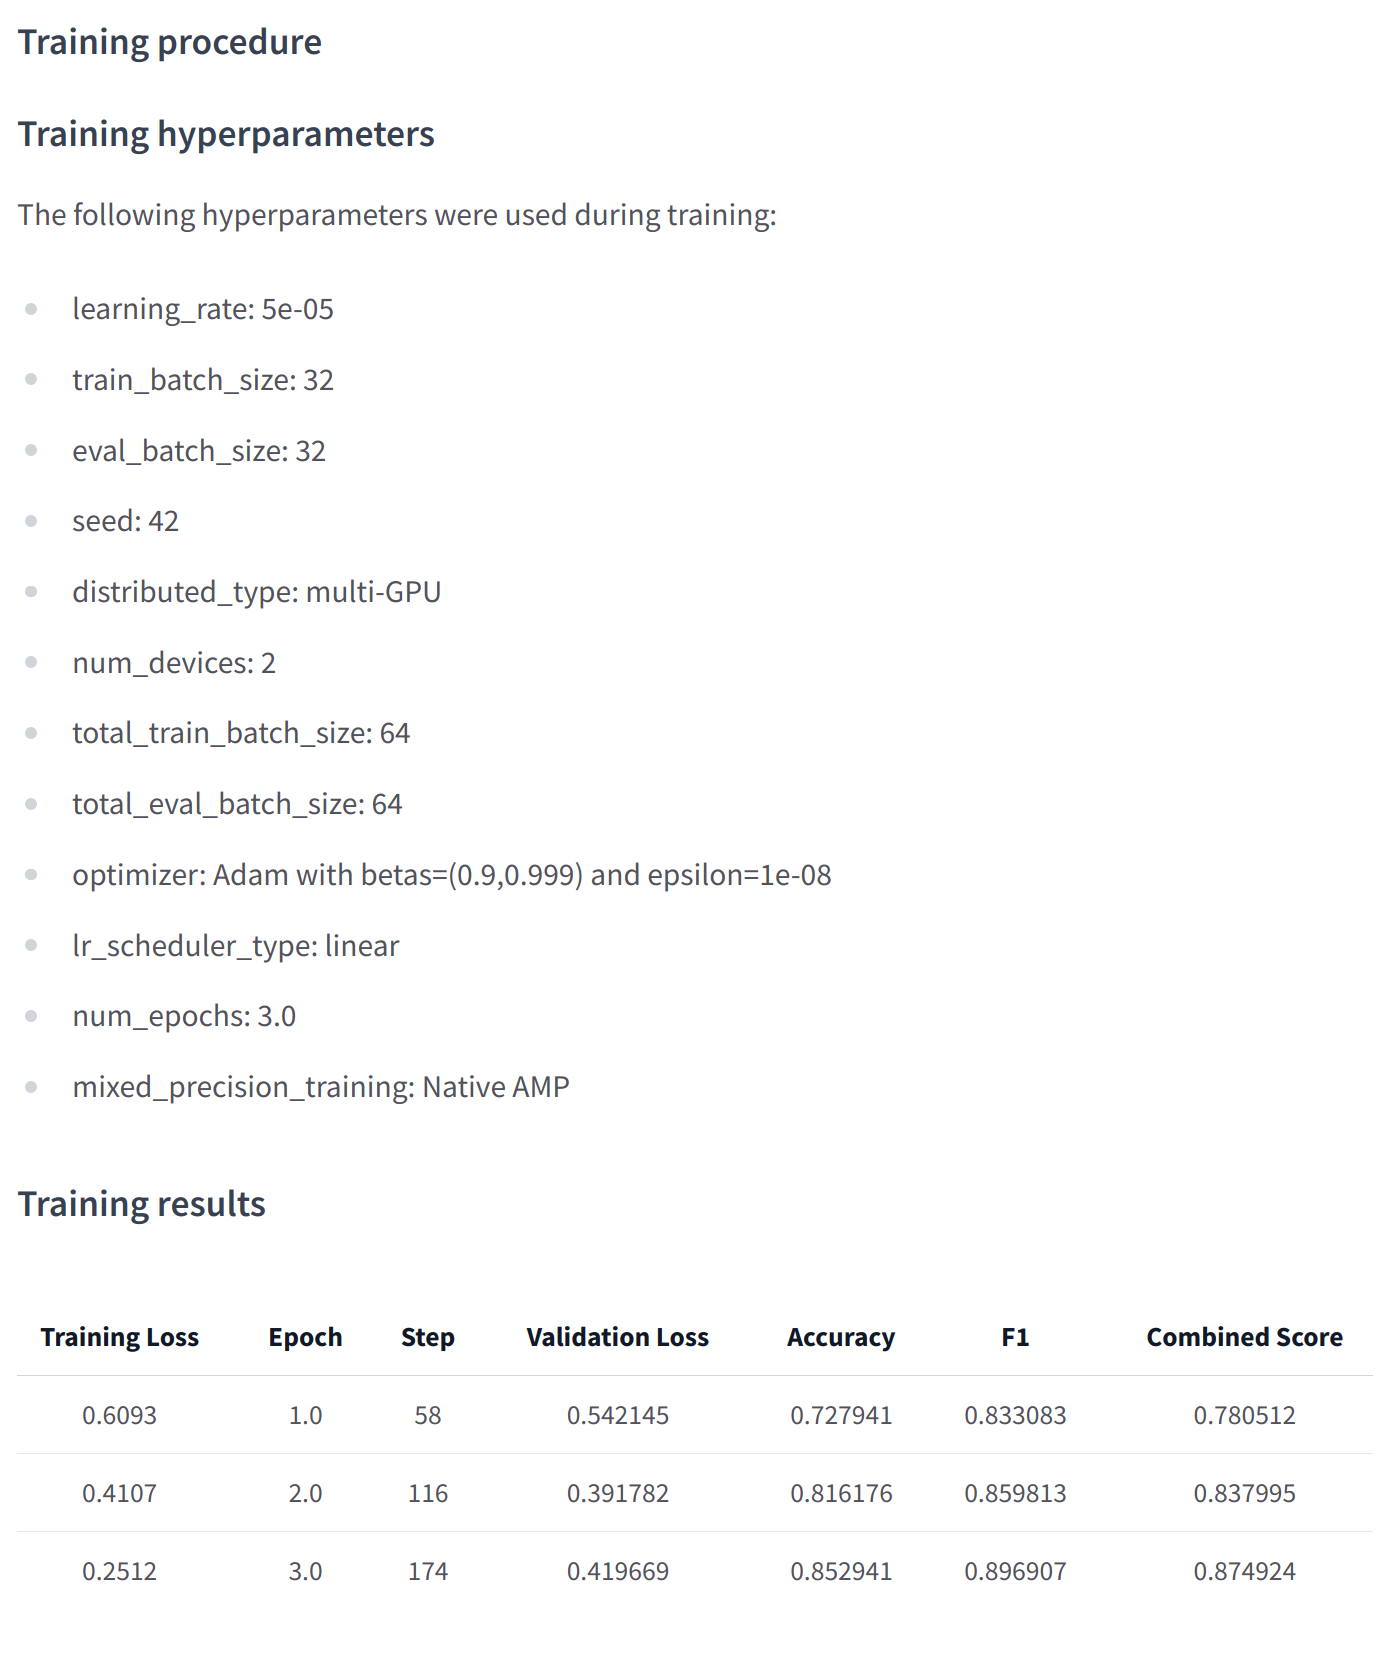

At a lower level, accessing the Model Huub can be done directly on models, tokenizers, and configuration objects via their push_to_hub() method. This method takes care of both the repository creation and pushing the model and tokenizer files directly to the repository. No manual handling is required, unlike with the API we'll see below.

To get an idea of how it works, let's first initialize a model and a tokenizer:

You're free to do whatever you want with these - add tokens to the tokenizer, train the model fine-tune it. Once you're happy with the